## Data Analysis

##### Phumrapee Pisutsin

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

### Data Cleaning

In [2]:
df = pd.read_csv("./product_data.csv")

df.head(1)

,No.,Which age group do you belong to?,What is your gender?,Which category do you currently belong to?,Which of the following best describes you?,Which of these factors are important to you when deciding which car to purchase?,How likely are you to opt for customised vehicle if there were no extra charges?,"Which of the following exterior components would you choose to customise (texture, layout, size, etc)?","Which of the following interior components would you choose to customise (texture, layout, size, etc)?",How much are you willing to spend on car customisation if surcharges are applicable?,Are you interested in designing your own components to personalise your car?,How much are you willing to pay for the personalised design?,Unnamed: 12
0,1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN


In [3]:
df.columns = ["No.", "Age", "Gender", "Category", "MarriageStatus", 
                "FactorsPurchase", "FreeCustomization", "ExteriorComponents", 
                "InteriorComponents", "WTSCustomization", "WantOwnPersonalization", 
                "WTSPersonalization", "PersonalizationJob"]

df.head(1)

,No.,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob
0,1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN


In [4]:
df["FactorsPurchaseCount"] = df["FactorsPurchase"].str.split(";").str.len().fillna(0)
df["ExteriorComponentsCount"] = df["ExteriorComponents"].str.split(";").str.len().fillna(0)
df["InteriorComponentsCount"] = df["InteriorComponents"].str.split(";").str.len().fillna(0)

df.head(1)

,No.,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob,FactorsPurchaseCount,ExteriorComponentsCount,InteriorComponentsCount
0,1,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,500-1000,No,500-1000,NaN,3.0,2.0,2


### Exploratory Data Analysis

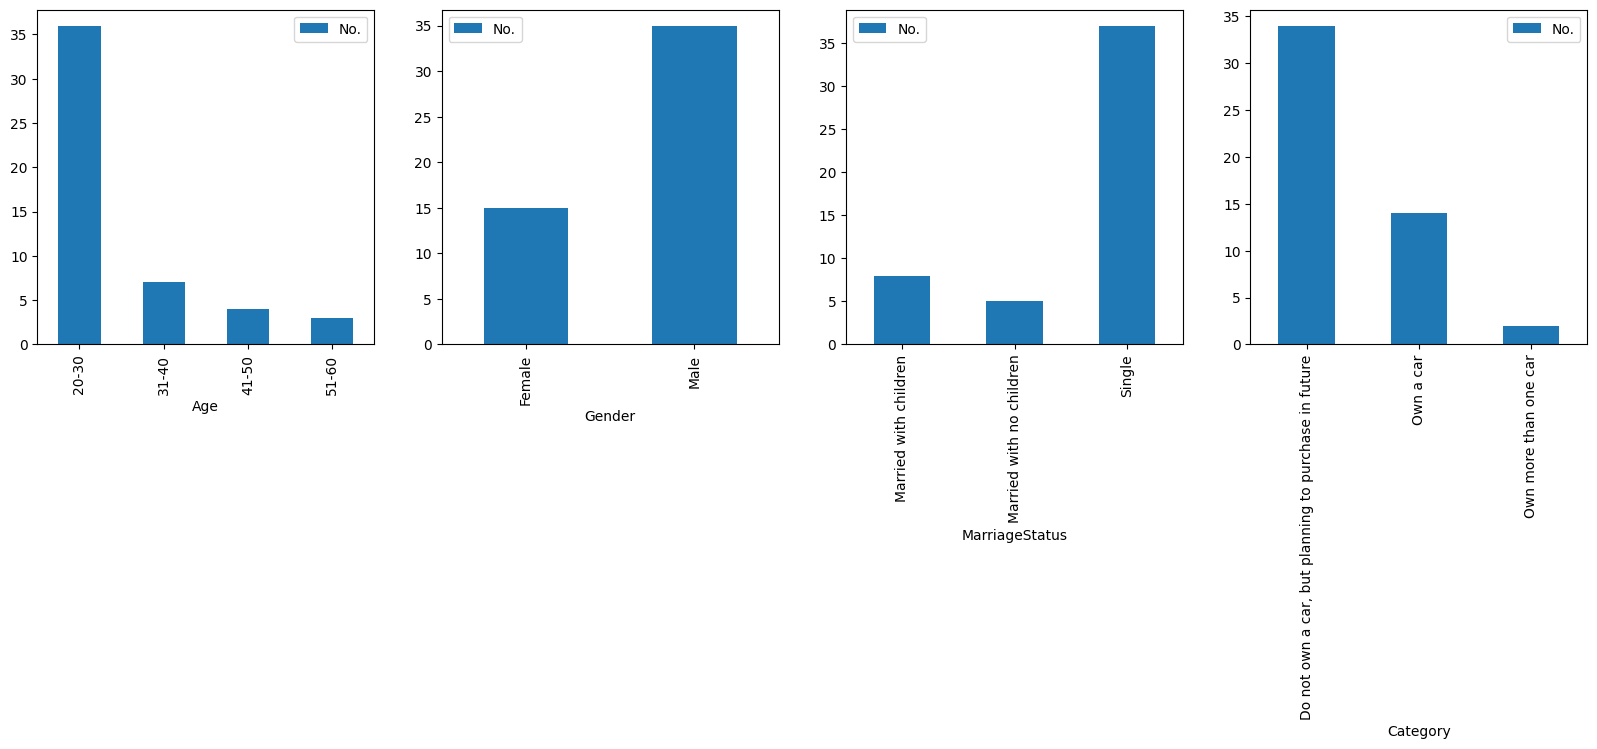

In [5]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
df.groupby("Age").count()[["No."]].plot(kind='bar', ax=ax)
ax = plt.subplot(442)
df.groupby("Gender").count()[["No."]].plot(kind='bar', ax=ax)
ax = plt.subplot(443)
df.groupby("MarriageStatus").count()[["No."]].plot(kind='bar', ax=ax)
ax = plt.subplot(444)
df.groupby("Category").count()[["No."]].plot(kind='bar', ax=ax)

plt.show()

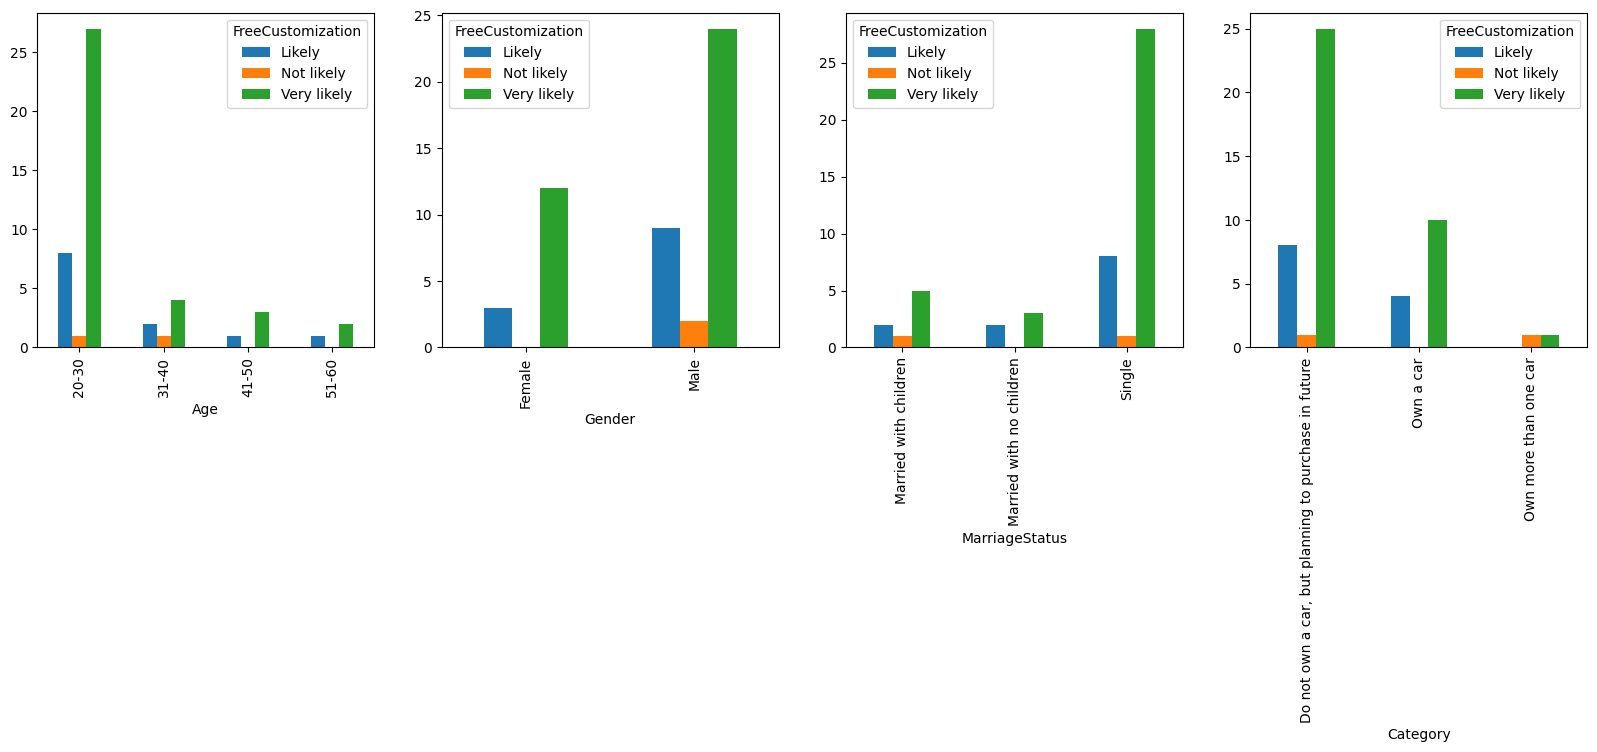

In [6]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['FreeCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['FreeCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['FreeCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['FreeCustomization']).plot(kind='bar', ax=ax)

plt.show()

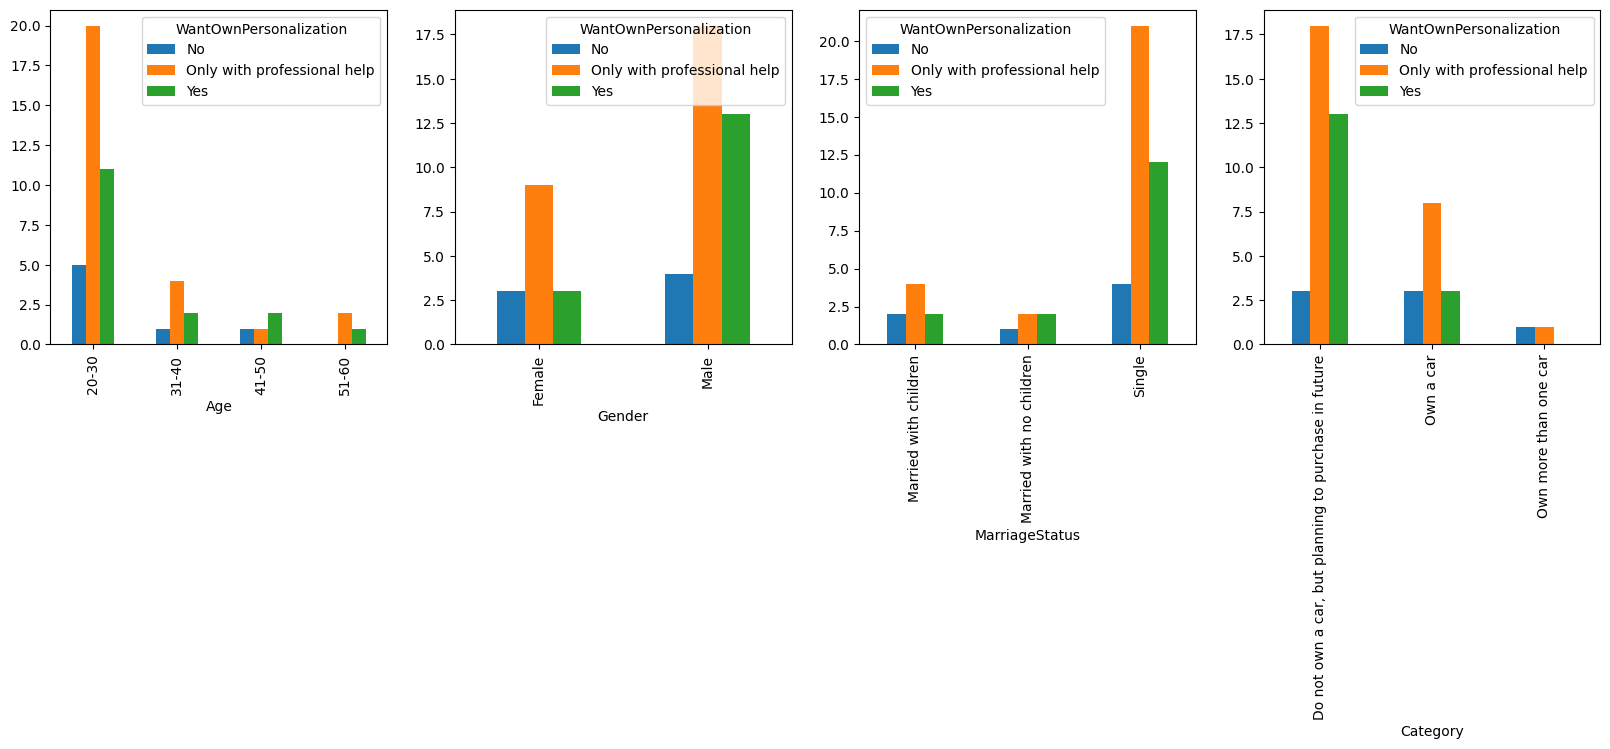

In [7]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['WantOwnPersonalization']).plot(kind='bar', ax=ax)

plt.show()


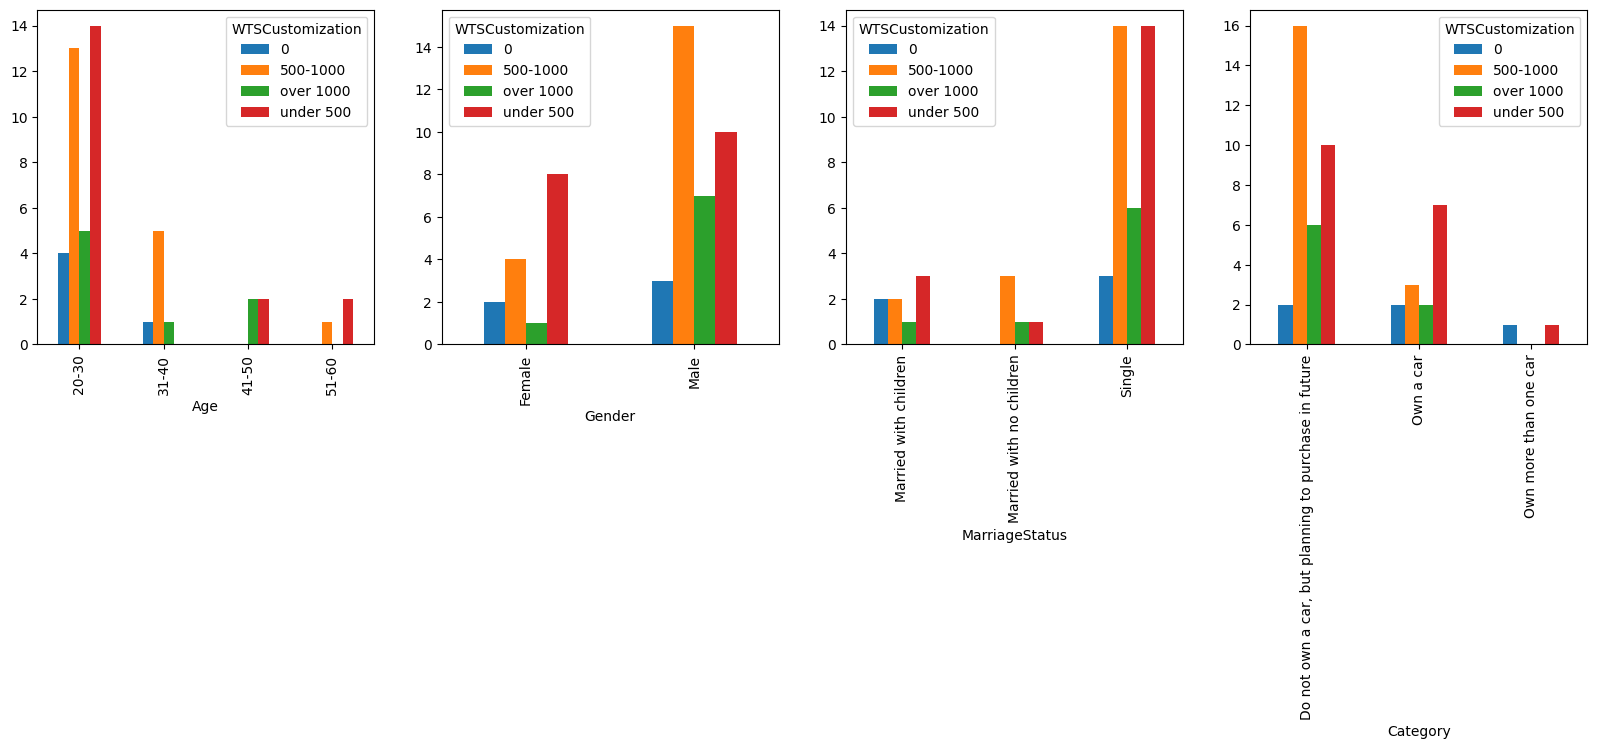

In [8]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['WTSCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['WTSCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['WTSCustomization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['WTSCustomization']).plot(kind='bar', ax=ax)

plt.show()

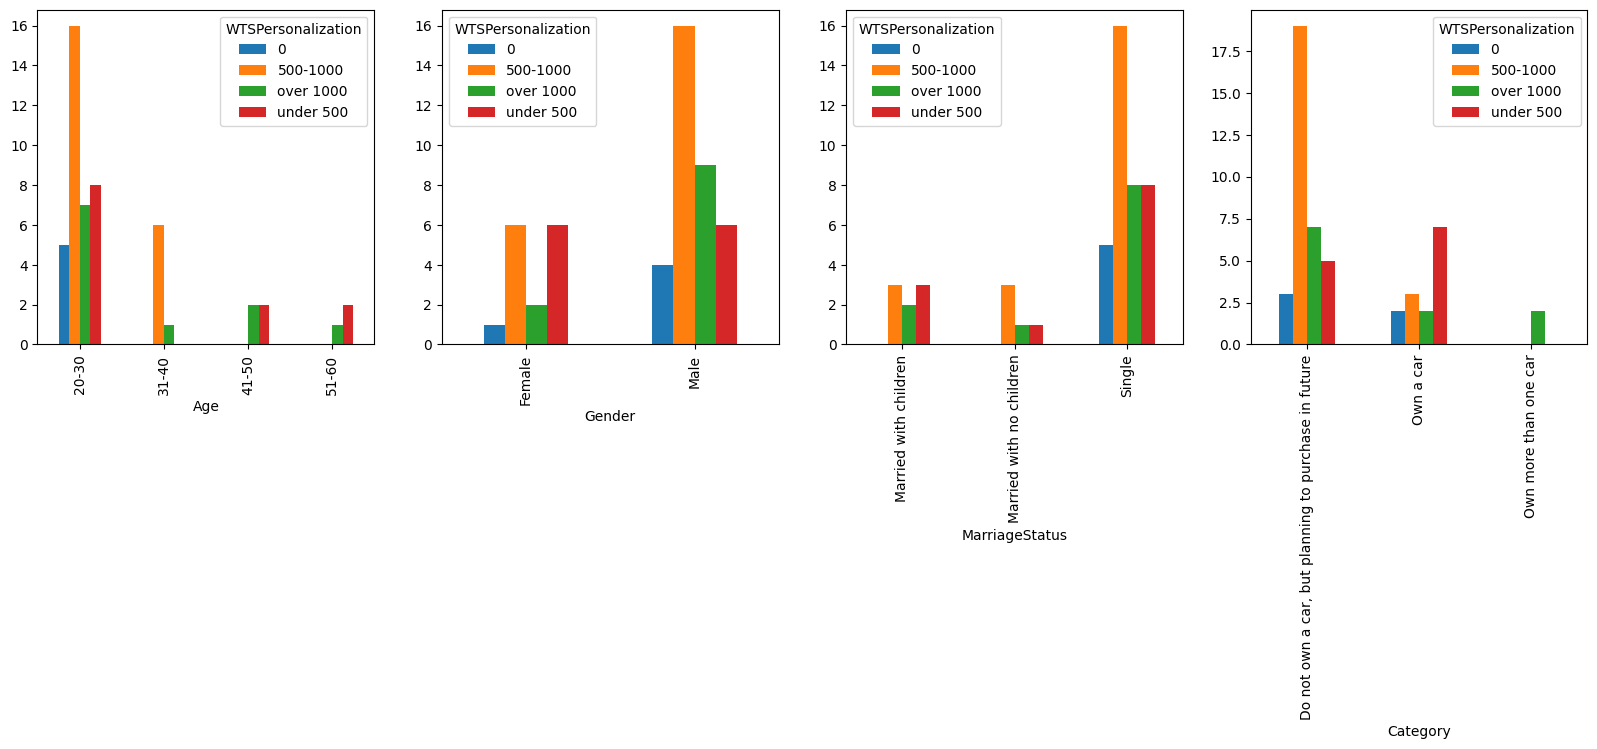

In [9]:
plt.rcParams["figure.figsize"] = (20,20)

ax = plt.subplot(441)
pd.crosstab(df['Age'], df['WTSPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(442)
pd.crosstab(df['Gender'], df['WTSPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(443)
pd.crosstab(df['MarriageStatus'], df['WTSPersonalization']).plot(kind='bar', ax=ax)
ax = plt.subplot(444)
pd.crosstab(df['Category'], df['WTSPersonalization']).plot(kind='bar', ax=ax)

plt.show()

### Association Rules Mining: Apriori Algorithm

In [10]:
df_factor = df.assign(ind=df["FactorsPurchase"].str.split(";"), dummy=1) \
    .explode('ind').pivot_table('dummy', 'No.', 'ind', fill_value=0).add_prefix('Feat_')

df_factor.columns = ["Factor_Aesthetics", "Factor_BrandName", "Factor_CustomizableOptions", 
                        "Factor_Functionality", "Factor_Price", "Factor_Size",
                        "Factor_Sustainability", "Factor_Technological"]

freq_items1 = apriori(df_factor, min_support = 0.5, use_colnames=True)
rules1 = association_rules(freq_items1, metric = "lift", min_threshold = 1)

rules1

C:\Users\petch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Factor_Aesthetics),(Factor_Price),0.612245,0.918367,0.571429,0.933333,1.016296,0.009163,1.224490
1,(Factor_Price),(Factor_Aesthetics),0.918367,0.612245,0.571429,0.622222,1.016296,0.009163,1.026411
2,(Factor_BrandName),(Factor_Price),0.612245,0.918367,0.571429,0.933333,1.016296,0.009163,1.224490
3,(Factor_Price),(Factor_BrandName),0.918367,0.612245,0.571429,0.622222,1.016296,0.009163,1.026411
4,(Factor_Functionality),(Factor_Technological),0.693878,0.653061,0.510204,0.735294,1.125919,0.057060,1.310658
5,(Factor_Technological),(Factor_Functionality),0.653061,0.693878,0.510204,0.781250,1.125919,0.057060,1.399417


In [11]:
df_ext = df.assign(ind=df["ExteriorComponents"].str.split(";"), dummy=1) \
    .explode('ind').pivot_table('dummy', 'No.', 'ind', fill_value=0).add_prefix('Ext_')

df_ext.columns = ["Ext_Bumpers", "Ext_Grilles", "Ext_Headlights", 
                    "Ext_SideMirrors", "Ext_Wheels", "Ext_BodyKit"]

freq_items2 = apriori(df_ext, min_support = 0.3, use_colnames=True)
rules2 = association_rules(freq_items2, metric = "lift", min_threshold = 1)

rules2

C:\Users\petch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Ext_Wheels),(Ext_Headlights),0.687500,0.458333,0.354167,0.515152,1.123967,0.039063,1.117188
1,(Ext_Headlights),(Ext_Wheels),0.458333,0.687500,0.354167,0.772727,1.123967,0.039063,1.375000


In [12]:
df_int = df.assign(ind=df["InteriorComponents"].str.split(";"), dummy=1) \
    .explode('ind').pivot_table('dummy', 'No.', 'ind', fill_value=0).add_prefix('Int_')

df_int.columns = ["Int_CenterCompartment", "Int_Dashboard", "Int_DoorHandles", 
                    "Int_MusicPlayer", "Int_SteeringWheel", "Int_SunBlocker", 
                    "Int_AirVent"]

freq_items3 = apriori(df_int, min_support = 0.4, use_colnames=True)
rules3 = association_rules(freq_items3, metric = "lift", min_threshold = 1)

rules3

C:\Users\petch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Int_Dashboard),(Int_CenterCompartment),0.84,0.48,0.42,0.500,1.041667,0.0168,1.04
1,(Int_CenterCompartment),(Int_Dashboard),0.48,0.84,0.42,0.875,1.041667,0.0168,1.28


In [13]:
df_test = df[["No.", "Age", "Gender", "MarriageStatus", "FreeCustomization", "WantOwnPersonalization", "PersonalizationJob"]]

df_test["Married"] = df_test["MarriageStatus"] != "Single"
df_test["Male"] = df_test["Gender"] == "Male"
df_test["Younger40"] = np.logical_or(df_test["Age"] == "20-30", df_test["Age"] == "31-40")
df_test["FreeCustomization"] = df_test["FreeCustomization"] != "Unlikely"
df_test["WantOwnPersonalization"] = df_test["WantOwnPersonalization"] != "No"
df_test["PersonalizationJob"] = df_test["PersonalizationJob"] == "Yes, I can design on my own"

del df_test["No."]
del df_test["Age"]
del df_test["Gender"]
del df_test["MarriageStatus"]

C:\Users\petch\AppData\Local\Temp\ipykernel_18276\2239330497.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Married"] = df_test["MarriageStatus"] != "Single"
C:\Users\petch\AppData\Local\Temp\ipykernel_18276\2239330497.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test["Male"] = df_test["Gender"] == "Male"
C:\Users\petch\AppData\Local\Temp\ipykernel_18276\2239330497.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

In [14]:
freq_items4 = apriori(df_test, min_support = 0.7, use_colnames=True)
rules4 = association_rules(freq_items4, metric = "lift", min_threshold = 1)

rules4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(FreeCustomization),(WantOwnPersonalization),1.00,0.86,0.86,0.860000,1.000000,0.0000,1.000000
1,(WantOwnPersonalization),(FreeCustomization),0.86,1.00,0.86,1.000000,1.000000,0.0000,inf
2,(FreeCustomization),(Male),1.00,0.70,0.70,0.700000,1.000000,0.0000,1.000000
3,(Male),(FreeCustomization),0.70,1.00,0.70,1.000000,1.000000,0.0000,inf
4,(FreeCustomization),(Younger40),1.00,0.86,0.86,0.860000,1.000000,0.0000,1.000000
5,(Younger40),(FreeCustomization),0.86,1.00,0.86,1.000000,1.000000,0.0000,inf
6,(WantOwnPersonalization),(Younger40),0.86,0.86,0.74,0.860465,1.000541,0.0004,1.003333
7,(Younger40),(WantOwnPersonalization),0.86,0.86,0.74,0.860465,1.000541,0.0004,1.003333
8,"(FreeCustomization, WantOwnPersonalization)",(Younger40),0.86,0.86,0.74,0.860465,1.000541,0.0004,1.003333
9,"(FreeCustomization, Younger40)",(WantOwnPersonalization),0.86,0.86,0.74,0.860465,1.000541,0.0004,1.003333


### Clustering: k-means

In [15]:
df.head(1)
plt.rcParams["figure.figsize"] = (6,6)

In [16]:
df_number = df.copy()

age_conversion = {"20-30": 25, "31-40": 35, "41-50": 45, "51-60": 55}
WTS_conversion = {"0": 0, "under 500": 500, "500-1000": 750, "over 1000": 1250}

df_number["Age"] = df_number["Age"].apply(lambda x: age_conversion[x])
df_number["WTSCustomization"] = df_number["WTSCustomization"].apply(lambda x: WTS_conversion[x])
df_number["WTSPersonalization"] = df_number["WTSPersonalization"].apply(lambda x: WTS_conversion[x])

df_number.head(1)

,No.,Age,Gender,Category,MarriageStatus,FactorsPurchase,FreeCustomization,ExteriorComponents,InteriorComponents,WTSCustomization,WantOwnPersonalization,WTSPersonalization,PersonalizationJob,FactorsPurchaseCount,ExteriorComponentsCount,InteriorComponentsCount
0,1,25,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Technological features;Functionality,Very likely,Wheels;Grilles,Steering wheel;Dashboard,750,No,750,NaN,3.0,2.0,2


In [17]:
colors = ['#DF2020', '#81DF20', '#2095DF', '#828282']
color_conv = {0:colors[0], 1:colors[1], 2:colors[2], 3:colors[3]}

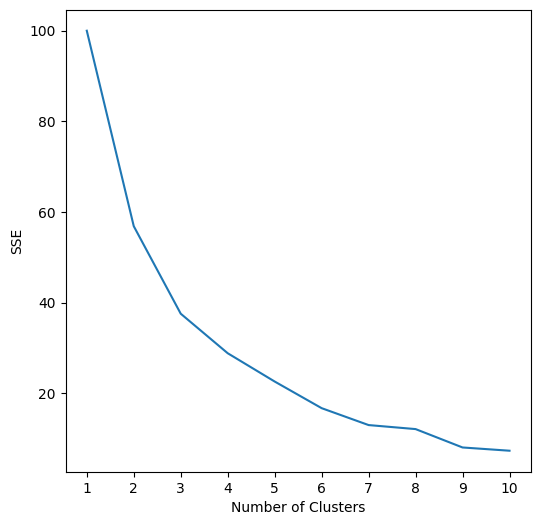

In [18]:
scaled = StandardScaler().fit_transform(df_number[["ExteriorComponentsCount", "FactorsPurchaseCount"]].dropna())

kmeans_kwargs = {"init": "random", "n_init": 10, "random_state": 1}

sse = []
for k in range(1, 11):
    kmeans =  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

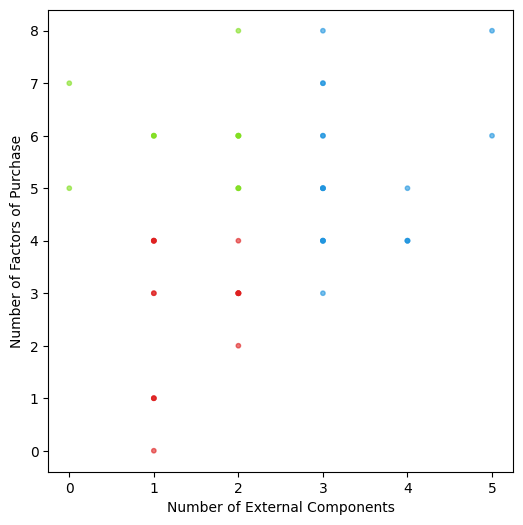

In [19]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit_predict(scaled)

plt.xlabel("Number of External Components")
plt.ylabel("Number of Factors of Purchase")
plt.scatter(df_number.ExteriorComponentsCount, df_number.FactorsPurchaseCount, c=np.array([color_conv[label] for label in kmeans.labels_]), alpha=0.6, s=10)

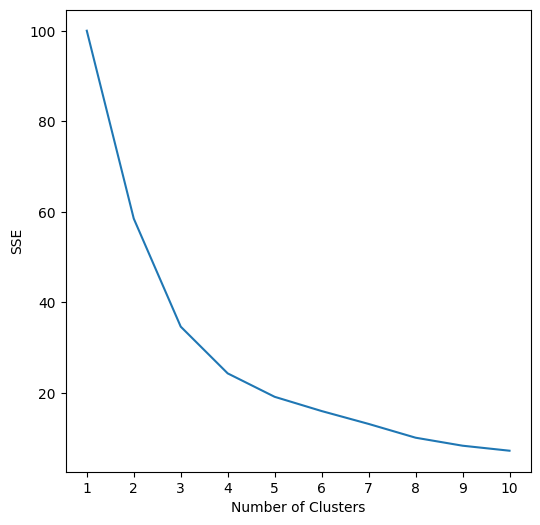

In [20]:
scaled = StandardScaler().fit_transform(df_number[["ExteriorComponentsCount", "InteriorComponentsCount"]].dropna())

kmeans_kwargs = {"init": "random", "n_init": 10, "random_state": 1}

sse = []
for k in range(1, 11):
    kmeans =  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

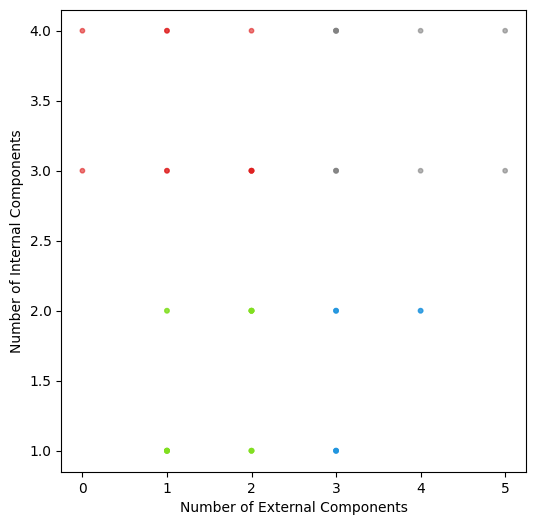

In [21]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit_predict(scaled)

plt.xlabel("Number of External Components")
plt.ylabel("Number of Internal Components")
plt.scatter(df_number.ExteriorComponentsCount, df_number.InteriorComponentsCount, c=np.array([color_conv[label] for label in kmeans.labels_]), alpha=0.6, s=10)

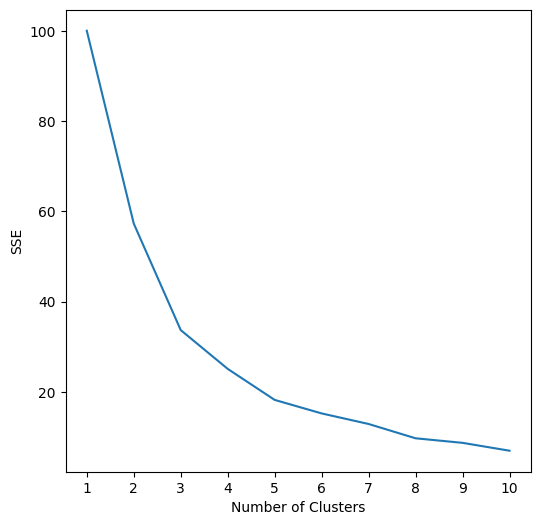

In [22]:
scaled = StandardScaler().fit_transform(df_number[["InteriorComponentsCount", "FactorsPurchaseCount"]].dropna())

kmeans_kwargs = {"init": "random", "n_init": 10, "random_state": 1}

sse = []
for k in range(1, 11):
    kmeans =  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

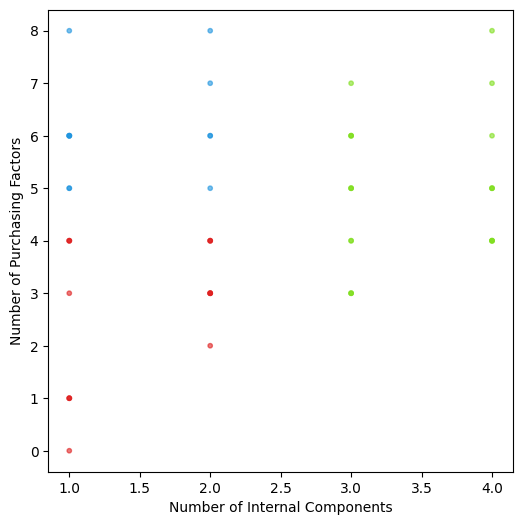

In [23]:
kmeans = KMeans(n_clusters=3, **kmeans_kwargs)
kmeans.fit_predict(scaled)

plt.xlabel("Number of Internal Components")
plt.ylabel("Number of Purchasing Factors")
plt.scatter(df_number.InteriorComponentsCount, df_number.FactorsPurchaseCount, c=np.array([color_conv[label] for label in kmeans.labels_]), alpha=0.6, s=10)

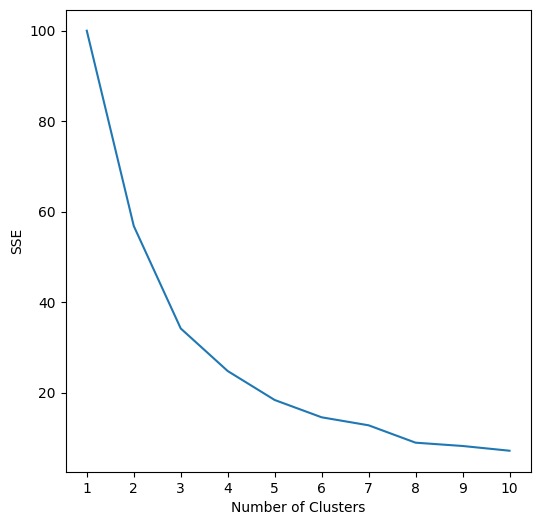

In [24]:
df_number["ComponentsCount"] = df_number["ExteriorComponentsCount"] + df_number["InteriorComponentsCount"]

scaled = StandardScaler().fit_transform(df_number[["ComponentsCount", "FactorsPurchaseCount"]].dropna())

kmeans_kwargs = {"init": "random", "n_init": 10, "random_state": 1}

sse = []
for k in range(1, 11):
    kmeans =  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

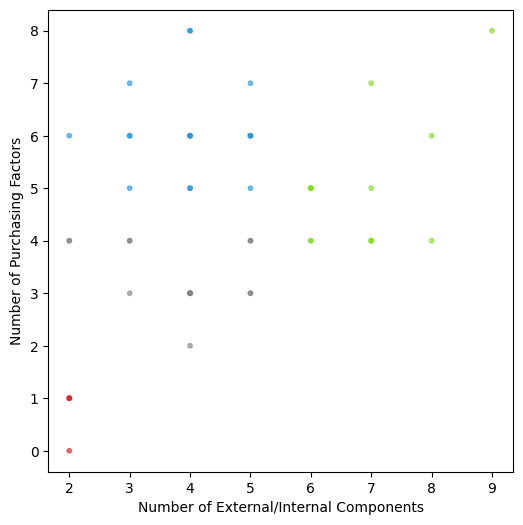

In [25]:
kmeans = KMeans(n_clusters=4, **kmeans_kwargs)
kmeans.fit_predict(scaled)

plt.xlabel("Number of External/Internal Components")
plt.ylabel("Number of Purchasing Factors")
plt.scatter(df_number.ComponentsCount, df_number.FactorsPurchaseCount, c=np.array([color_conv[label] for label in kmeans.labels_]), alpha=0.6, s=10)

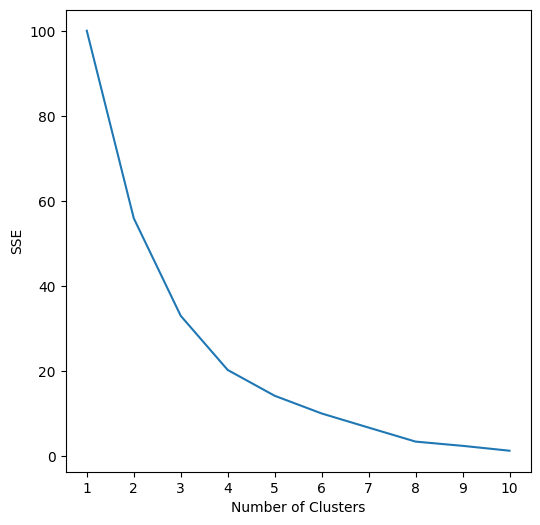

In [26]:
scaled = StandardScaler().fit_transform(df_number[["WTSCustomization", "WTSPersonalization"]].dropna())

kmeans_kwargs = {"init": "random", "n_init": 10, "random_state": 1}

sse = []
for k in range(1, 11):
    kmeans =  KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled)
    sse.append(kmeans.inertia_)

plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

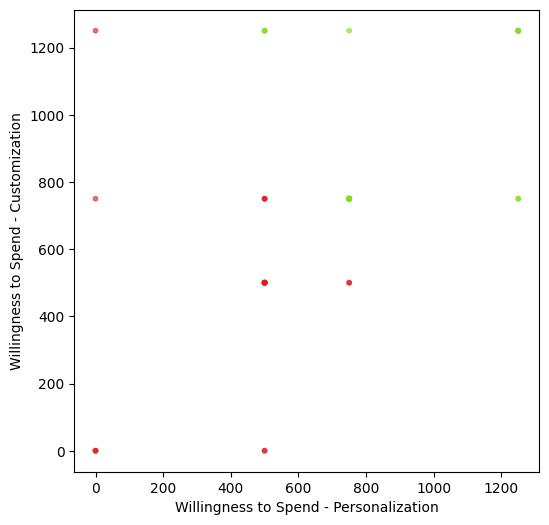

In [27]:
kmeans = KMeans(n_clusters=2, **kmeans_kwargs)
kmeans.fit_predict(scaled)

plt.xlabel("Willingness to Spend - Personalization")
plt.ylabel("Willingness to Spend - Customization")
plt.scatter(df_number.WTSCustomization, df_number.WTSPersonalization, c=np.array([color_conv[label] for label in kmeans.labels_]), alpha=0.6, s=10)

### Classification: Decision Tree Classifier

In [28]:
df_number_numerical = df_number[["Age", "WTSCustomization", "WTSPersonalization", "FactorsPurchaseCount", "ExteriorComponentsCount", "InteriorComponentsCount", "ComponentsCount"]]

df_number_numerical.head(1)

,Age,WTSCustomization,WTSPersonalization,FactorsPurchaseCount,ExteriorComponentsCount,InteriorComponentsCount,ComponentsCount
0,25,750,750,3.0,2.0,2,4.0


In [29]:
df_test = df_test * 1

df_test.head(1)

,FreeCustomization,WantOwnPersonalization,PersonalizationJob,Married,Male,Younger40
0,1,0,0,0,1,1


In [30]:
df_classification = pd.concat([df_test, df_number_numerical], axis=1, join="inner")

df_classification.head(1)

,FreeCustomization,WantOwnPersonalization,PersonalizationJob,Married,Male,Younger40,Age,WTSCustomization,WTSPersonalization,FactorsPurchaseCount,ExteriorComponentsCount,InteriorComponentsCount,ComponentsCount
0,1,0,0,0,1,1,25,750,750,3.0,2.0,2,4.0


In [31]:
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(
    df_classification[["Married", "Male", "Younger40", "Age", "WTSPersonalization"]], 
    df_classification["WantOwnPersonalization"], 
    test_size=0.3, random_state=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8666666666666667


[Text(0.5454545454545454, 0.9166666666666666, 'WTSPersonalization <= 1000.0\ngini = 0.245\nsamples = 35\nvalue = [5, 30]'),
 Text(0.36363636363636365, 0.75, 'Age <= 30.0\ngini = 0.198\nsamples = 27\nvalue = [3, 24]'),
 Text(0.2727272727272727, 0.5833333333333334, 'WTSPersonalization <= 250.0\ngini = 0.278\nsamples = 18\nvalue = [3, 15]'),
 Text(0.18181818181818182, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.36363636363636365, 0.4166666666666667, 'Male <= 0.5\ngini = 0.32\nsamples = 15\nvalue = [3, 12]'),
 Text(0.18181818181818182, 0.25, 'WTSPersonalization <= 625.0\ngini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.09090909090909091, 0.08333333333333333, 'gini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.2727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.5454545454545454, 0.25, 'Married <= 0.5\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.45454545454545453, 0.08333333333333333, 'gini = 0.444\nsamples = 6

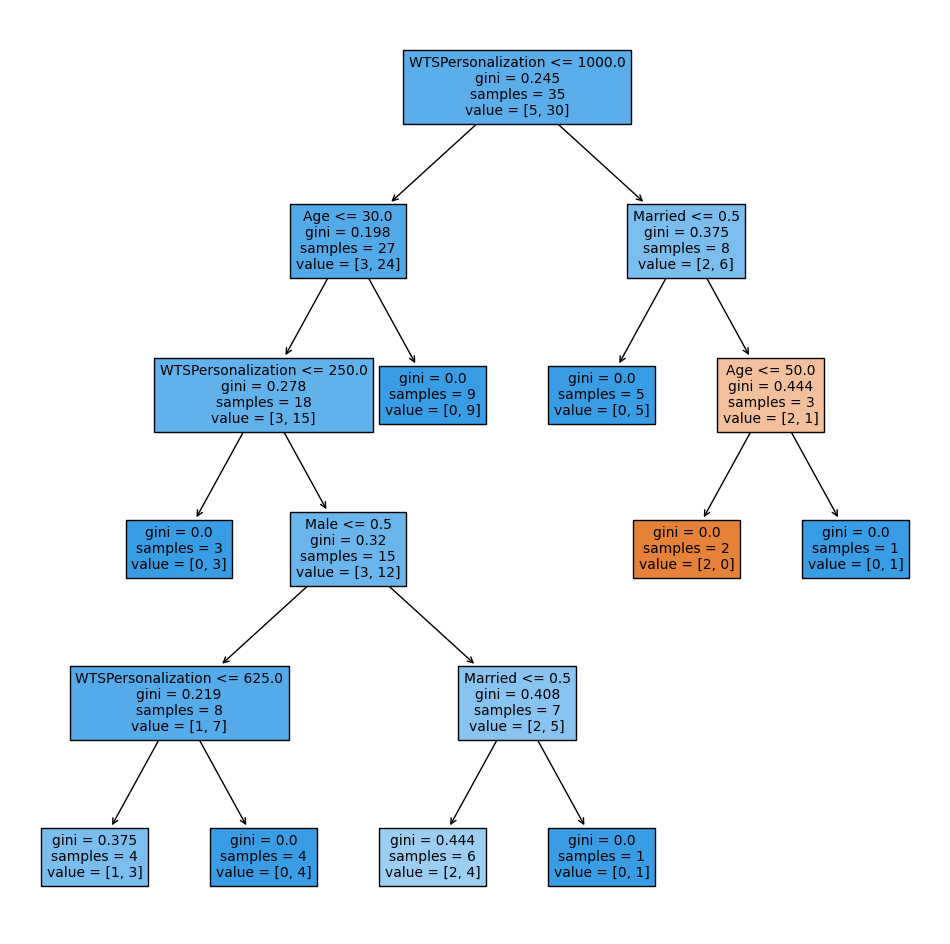

In [32]:
plt.rcParams["figure.figsize"] = (12, 12)

tree.plot_tree(clf, filled=True, label='all', fontsize = 10, feature_names=["Married", "Male", "Younger40", "Age", "WTSPersonalization"])